<a href="https://colab.research.google.com/github/DrFrank25/Syndecan_4-Ag73/blob/main/RMSF_Complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Script Complex RMSF with Savitzky–Golay Smoothing**

In [ ]:
# --- Import libraries ---
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
from scipy.signal import savgol_filter

In [ ]:
# ===== Settings =====
SMOOTH_WINDOW = 11  # maximum smoothing window size (must be odd)
POLY_ORDER = 2      # polynomial order for Savitzky–Golay
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
FIGSIZE = (11, 6)
DPI = 1200
# Legend names
LEGEND_NAMES = ["Run 1", "Run 2", "Run 3"]
# ====================

In [ ]:
# File upload
uploaded = files.upload()
if not uploaded:
    raise SystemExit("No file uploaded. Please upload .xvg files.")


Saving rmsf_Run1.xvg to rmsf_Run1.xvg
Saving rmsf_Run2.xvg to rmsf_Run2.xvg
Saving rmsf_Run3.xvg to rmsf_Run3.xvg


In [ ]:
# Function to read .xvg data
def read_xvg_from_bytes(content_bytes, encoding='utf-8'):
    s = content_bytes.decode(encoding, errors='replace')
    times, vals = [], []
    for line in s.splitlines():
        line = line.strip()
        if not line or line.startswith(('#', '@')):
            continue
        parts = line.split()
        if len(parts) >= 2:
            try:
                times.append(float(parts[0]))
                vals.append(float(parts[1]))
            except ValueError:
                continue
    return np.array(times), np.array(vals)

plt.figure(figsize=FIGSIZE)

<Figure size 1100x600 with 0 Axes>

<Figure size 1100x600 with 0 Axes>

Run 1:
  Mean: 0.70 nm
  Standard deviation: 0.3 nm

Run 2:
  Mean: 0.76 nm
  Standard deviation: 0.3 nm

Run 3:
  Mean: 0.90 nm
  Standard deviation: 0.3 nm



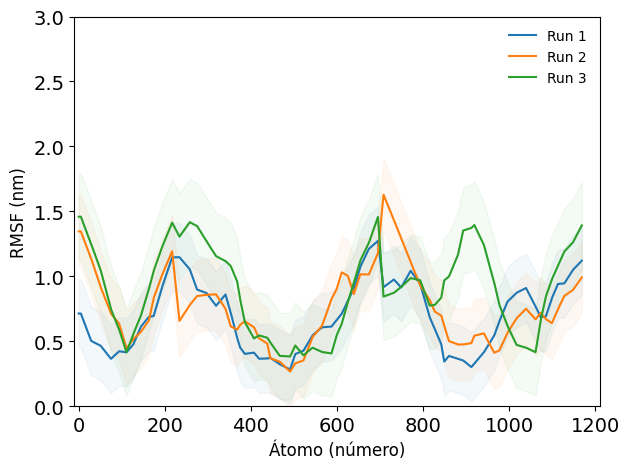

In [ ]:
# Loop over uploaded files
for i, (name, content) in enumerate(uploaded.items()):
    time, rmsd = read_xvg_from_bytes(content)

    if time.size == 0 or rmsd.size == 0:
        print(f"Warning: '{name}' contains no valid data. Skipping.")
        continue

    # Sort by time
    order = np.argsort(time)
    time = time[order]
    rmsd = rmsd[order]

    # --- Interpolation to normalize the time axis ---
    # Define a common time axis (e.g., 0 up to max, step of 0.5 ns)
    common_time = np.arange(0, np.nanmax(time), 0.5)  # adjust step here

    # Interpolate only valid points
    mask_valid_interp = np.isfinite(time) & np.isfinite(rmsd)
    rmsd_interp = np.interp(common_time, time[mask_valid_interp], rmsd[mask_valid_interp])

    # Replace variables for the rest of the code
    time = common_time
    rmsd = rmsd_interp

    # Mask for valid data
    mask_valid = np.isfinite(time) & np.isfinite(rmsd) & (time >= 0) & (rmsd >= 0)

    time_masked = np.where(mask_valid, time, np.nan)
    rmsd_masked = np.where(mask_valid, rmsd, np.nan)

    mean_val = np.nanmean(rmsd_masked)
    std_val = np.nanstd(rmsd_masked)

    # --- SEM suavização: usamos apenas os dados válidos diretamente ---
    smooth = rmsd_masked.copy()

    color = COLORS[i % len(COLORS)]

    # Curve name for legend
    curve_name = LEGEND_NAMES[i] if i < len(LEGEND_NAMES) else f"Run {i+1}"

    # Raw curve (transparente)
    valid_raw = np.isfinite(time_masked) & np.isfinite(rmsd_masked)
    plt.plot(time_masked[valid_raw], rmsd_masked[valid_raw],
             linewidth=1.0, alpha=0.3, color=color)

    # "Smoothed" curve agora é apenas a curva original
    valid_smooth = np.isfinite(time_masked) & np.isfinite(smooth)
    plt.plot(time_masked[valid_smooth], smooth[valid_smooth],
             label=f"{curve_name}")

    # ± standard deviation band
    low = smooth[valid_smooth] + std_val
    high = smooth[valid_smooth] - std_val
    plt.fill_between(time_masked[valid_smooth], low, high, alpha=0.05, color=color)

    print(f"{curve_name}:")
    print(f"  Mean: {mean_val:.2f} nm")
    print(f"  Standard deviation: {std_val:.1f} nm\n")

    # Axes configuration
    plt.xlabel("Atom (numeber)", fontsize=12)
    plt.ylabel("RMSF (nm)", fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=14)

    # Tick range
    plt.xlim(-10, 1210)  # X-axis limits
    plt.ylim(0.1, 3.0)  # Y-axis limits
    plt.xticks(np.arange(0, 1201, 200))     # from 0 to 1200, step 200
    plt.yticks(np.arange(0.0, 3.01, 0.5))  # from 0 to 3.5, step 0.5

    # Desired run names
    run_names = ["Run 1", "Run 2", "Run 3"]


# Custom legend
plt.legend(
    loc='upper right',
    fontsize=10,
    frameon=True,
    facecolor='white',
    edgecolor='white',
    fancybox=False,
    shadow=False
)

plt.grid(False)
plt.tight_layout()

# --- save and render the figure (at the end of the script, BEFORE plt.show()) ---
fig = plt.gcf()  # get the current figure (the one just plotted)
fig.tight_layout()
fig.canvas.draw()  # force rendering in Colab
plt.show()

In [ ]:
# Save figure in high resolution with a specific name
fig.savefig(
    "rmsf_complex.png",
    dpi=1200,
    bbox_inches='tight',
    transparent=False  # change to False if you prefer a solid background
)

from google.colab import files
files.download("rmsf_complex.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>